## Cleanup Previo
En el respositorio del proyecto se encuentran dos pequeños scripts de Python, `download.py` y `rewrite.py`. Estos scripts fueron ejecutados para descargar el set de datos de la página provista, y juntar los resultados (varios archivos `.csv`) en un sólo archivo, a través de `pandas`. A partir de este último, se hace un filtrado de los resultados por ubicación de las propiedades, para quedarnos solo con las del Gran Buenos Aires. Este último DataFrame es el punto de partida de nuestro análisis exploratorio, y para no tener que correr la limpieza cada vez que se trabaja sobre él, se guarda en un csv nuevo.

In [2]:
import pandas as pd
import numpy as np
import mplleaflet
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
from shapely.geometry import Point
%matplotlib inline  

## Carga de datos
Cargo solo las columnas que nos pueden llegar a interesar. En particular, ignoro varias que tienen URL a imágenes y descripciones de las propiedades individuales. 

In [7]:
dtypes = {
    'country_name': str,
    'expenses': object,
    'id': str,
    'title': str,
    'state_name': str,
    'lat': float,
    'lon': float
}
cols = range(6) + range(8, 18) + [20, 21] + range(23, 27)
df = pd.read_csv('data/data_gba_total.csv', dtype=dtypes, usecols=cols)


In [16]:
len(df)

2409471

In [4]:
df.columns

Index([u'country_name', u'created_on', u'currency', u'expenses', u'floor',
       u'geonames_id', u'lat', u'lat-lon', u'lon', u'operation', u'place_name',
       u'place_with_parent_names', u'price', u'price_aprox_local_currency',
       u'price_aprox_usd', u'price_per_m2', u'property_type', u'rooms',
       u'surface_covered_in_m2', u'surface_in_m2', u'surface_total_in_m2',
       u'title'],
      dtype='object')

### Filtro por Región
Las regiones están en la columna `place_with_parent_names` con el formato "Argentina|Capital Federal|Almagro|", guardo está informacion por separado

In [5]:
# Verifico que todos los rows tengan place definido
len(df.loc[df.place_with_parent_names.isnull() == True])

0

In [ ]:
def split_region(x):
    state = x.split('|')[2]
    return state

def split_neighborhood(x):
    state = x.split('|')[3]
    return state

df['state'] = df.place_with_parent_names.apply(split_region)
df['barrio'] = df.place_with_parent_names.apply(split_neighborhood)

## Barrios más caros

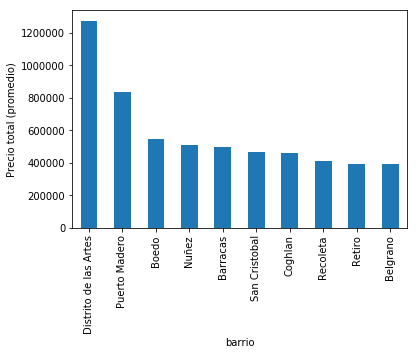

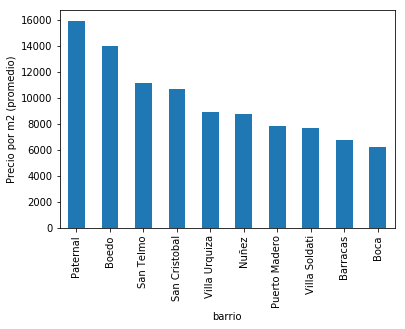

In [34]:
price = df.loc[df['state'] == 'Capital Federal'].loc[df['property_type'] == 'apartment'].groupby('barrio')['price'].mean().nlargest(10).plot(kind='bar')
price.set_ylabel("Precio total (promedio)")
plt.show()
price_per_m2 = df.loc[df['state'] == 'Capital Federal'].loc[df['property_type'] == 'apartment'].groupby('barrio')['price_per_m2'].mean().nlargest(10).plot(kind='bar')
price_per_m2.set_ylabel("Precio por m2 (promedio)")
plt.show()

Se puede observar que algunos barrios coinciden en ambos casos. En particular el primer gráfico es consistente con [fuentes externas](http://www.lanacion.com.ar/2059858-los-barrios-mas-caros-de-la-ciudad-para-alquilar-un-departamento-de-dos-ambientes)

In [53]:
df.loc[df['barrio'] == 'Distrito de las Artes']

,country_name,created_on,currency,expenses,floor,geonames_id,lat,lat-lon,lon,operation,...,price_aprox_usd,price_per_m2,property_type,rooms,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title,state,barrio
28928,Argentina,2016-04-12,ARS,NaN,NaN,NaN,-34.627617,"-34.6276174,-58.3606601",-58.360660,sell,...,157977.07,NaN,apartment,3.0,NaN,NaN,98.0,PUERTO PAMPA,Capital Federal,Distrito de las Artes
28929,Argentina,2016-04-12,ARS,NaN,NaN,NaN,-34.627617,"-34.6276174,-58.3606601",-58.360660,sell,...,157474.20,NaN,apartment,3.0,NaN,NaN,96.0,PUERTO PAMPA,Capital Federal,Distrito de las Artes
28930,Argentina,2016-04-12,ARS,NaN,NaN,NaN,-34.627617,"-34.6276174,-58.3606601",-58.360660,sell,...,137444.35,NaN,apartment,3.0,NaN,NaN,78.0,PUERTO PAMPA,Capital Federal,Distrito de las Artes
28931,Argentina,2016-04-12,ARS,NaN,NaN,NaN,-34.627617,"-34.6276174,-58.3606601",-58.360660,sell,...,132454.23,NaN,apartment,3.0,NaN,NaN,94.0,PUERTO PAMPA,Capital Federal,Distrito de las Artes
28932,Argentina,2016-04-12,ARS,NaN,NaN,NaN,-34.627617,"-34.6276174,-58.3606601",-58.360660,sell,...,131800.35,NaN,apartment,3.0,NaN,NaN,87.0,PUERTO PAMPA,Capital Federal,Distrito de las Artes
28933,Argentina,2016-04-12,ARS,NaN,NaN,NaN,-34.627617,"-34.6276174,-58.3606601",-58.360660,sell,...,131141.99,NaN,apartment,3.0,NaN,NaN,87.0,PUERTO PAMPA,Capital Federal,Distrito de las Artes
28934,Argentina,2016-04-12,ARS,NaN,NaN,NaN,-34.627617,"-34.6276174,-58.3606601",-58.360660,sell,...,128173.68,NaN,apartment,3.0,NaN,NaN,67.0,PUERTO PAMPA,Capital Federal,Distrito de las Artes
28935,Argentina,2016-04-12,ARS,NaN,NaN,NaN,-34.627617,"-34.6276174,-58.3606601",-58.360660,sell,...,128173.68,NaN,apartment,3.0,NaN,NaN,67.0,PUERTO PAMPA,Capital Federal,Distrito de las Artes
28936,Argentina,2016-04-12,ARS,NaN,NaN,NaN,-34.627617,"-34.6276174,-58.3606601",-58.360660,sell,...,124472.68,NaN,apartment,3.0,NaN,NaN,80.0,PUERTO PAMPA,Capital Federal,Distrito de las Artes
28937,Argentina,2016-04-12,ARS,NaN,NaN,NaN,-34.627617,"-34.6276174,-58.3606601",-58.360660,sell,...,122122.81,NaN,apartment,3.0,NaN,NaN,73.0,PUERTO PAMPA,Capital Federal,Distrito de las Artes


In [54]:
df_deptos_caros_capital = df.dropna(subset=['lat', 'lon'], how='any').loc[(df.property_type.str.contains('apartment'))&(df.place_name == 'Capital Federal')].sort_values('price_per_m2',ascending=False).head(100)

In [6]:
geometry = [Point(x,y) for x,y in zip(df_deptos_caros_capital['lon'], df_deptos_caros_capital['lat'])]

gs = GeoDataFrame(df_deptos_caros_capital, geometry=geometry)

In [7]:
gs.plot(marker='o', color='red', markersize=60, figsize=(4, 4))
mplleaflet.display()

In [19]:
df.loc[df['place_name'] == 'Capital Federal'].groupby('place_name')['price'].mean()

place_name
Capital Federal    303885.332917
Name: price, dtype: float64